The purpose of this code is to quantify the nuclei, the size and number of synuclein inclusions, and the lysosomal surface area in the lysotracker experiments.

Import Libraries

In [76]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.filters import gaussian, threshold_otsu
from skimage.morphology import remove_small_objects, binary_dilation, disk, binary_closing
from skimage.measure import label, regionprops
from skimage import exposure
import czifile
from skimage.filters import try_all_threshold
from skimage.filters import threshold_multiotsu
import skimage
import numpy as np
import czifile
from czifile import CziFile
import matplotlib.pyplot as plt
from skimage import filters, morphology, segmentation
import numpy as np
from skimage.measure import regionprops
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.measure import label, regionprops
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.measure import label
from skimage.filters import try_all_threshold
import czifile as czi
import pandas as pd
from skimage.filters import gaussian
from skimage.filters import threshold_otsu
from skimage import exposure
from skimage import morphology
from skimage.measure import label
from skimage.morphology import remove_small_objects
from skimage import color, filters, feature, transform
from skimage.morphology import binary_dilation, disk, binary_erosion
from skimage import color, filters, feature, transform, draw
from os import listdir
from os.path import isfile, join
from cellpose import io, models, plot
from skimage import io, filters, feature, measure, color
from IPython.display import clear_output
from scipy.ndimage import binary_fill_holes
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy.ndimage import distance_transform_edt
model = models.Cellpose(model_type='cyto')

c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\cellpose\resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename, 

In [77]:
from skimage import io
from matplotlib import pyplot as plt
def show_image(image):
    io.imshow(image)
    plt.show()

Define Sub Functions

In [78]:
# def extract_image_paths(folder):
#     """Extract all image file paths from the specified folder."""
#     return [os.path.join(folder, f) for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

# def read_czi_image(image_path, dapi_channel_idx=2, green_channel_idx=1, red_channel_idx=0):
#     """Load and extract dapi, green, and red channel data from a CZI file."""
#     czi_file = czifile.CziFile(image_path)
#     czi_data = czi_file.asarray()
#     dapi_channel_data = np.squeeze(czi_data[:, :, dapi_channel_idx, :, :, :])
    
#     green_channel_data = np.squeeze(czi_data[:, :, green_channel_idx, :, :, :])
#     red_channel_data = np.squeeze(czi_data[:, :, red_channel_idx, :, :, :])
    
#     return dapi_channel_data, green_channel_data, red_channel_data


# def otsu_thresholding(channel):
#     """Apply Otsu's thresholding and morphological closing to the channel."""
#     threshold_value = threshold_otsu(channel)
#     binary_image = channel > threshold_value
#     # show_image(binary_image)
#     closed_image = binary_closing(binary_image, disk(3))
#     labeled_image = label(closed_image)
#     return closed_image, labeled_image

def calculate_surface_area(labeled_image, channel=None):
    """Calculate the total surface area for labeled regions."""
    props = regionprops(labeled_image, channel)
    return sum(prop.area for prop in props)

# def preprocess_dapi_channel(dapi_channel):
#     """Preprocess the DAPI channel for nuclei quantification."""
#     blurred_dapi = gaussian(dapi_channel, sigma=2)
#     threshold_value = threshold_otsu(blurred_dapi)
#     binary_image = blurred_dapi > threshold_value
#     # show_image(binary_image)
#     cleaned_image = remove_small_objects(binary_image, min_size=400)
#     merged_image = binary_dilation(cleaned_image, footprint=disk(5))
#     labeled_image = label(merged_image)
#     return labeled_image

# def count_nuclei(labeled_image):
#     """Count the number of nuclei in the labeled image."""
#     return len(np.unique(labeled_image)) - 1

# def preprocess_green_channel(green_channel):
#     """Preprocess the green channel for inclusion quantification."""
#     # TODO: adjust_gamma maybe? 
#     confocal_img = exposure.adjust_sigmoid(green_channel, cutoff=0.5)
#     # confocal_img = green_channel
    
#     confocal_img = (confocal_img - confocal_img.min()) / (confocal_img.max() - confocal_img.min())
   
#     # for cutoff in np.arange(0, 1.1, 0.1):
#     #     test_confocal_img = exposure.adjust_sigmoid(green_channel, cutoff=cutoff)
#     #     test_confocal_img = (test_confocal_img - test_confocal_img.min()) / (test_confocal_img.max() - test_confocal_img.min())
#     #     print("cutoff:",cutoff)
#     #     show_image(test_confocal_img)
#     # return confocal_img

#     show_image(confocal_img)
#     return confocal_img

# def threshold_inclusions(confocal_img):
#     """Threshold the preprocessed green channel to segment inclusions."""
#     thresholds = threshold_multiotsu(confocal_img)
#     print(thresholds)
#     # threshold = 0.15 
#     binary_image = confocal_img > thresholds[1]
#     show_image(binary_image)
#     labeled_image = label(binary_image)
#     return binary_image, labeled_image

# def measure_inclusion_sizes(labeled_image, confocal_img):
#     """Measure the sizes of inclusions."""
#     props = regionprops(labeled_image, confocal_img)
#     sizes = [prop.area for prop in props]
#     return [size for size in sizes if size > 10]




# def measure_overlap_sizes(labeled_image_inclusions, binary_image_otsu):
#     """Measure the sizes of overlap"""
#     props = regionprops(labeled_image_inclusions)
#     sizes = [prop.area for prop in props]
#     filtered_image_inclusions = np.zeros(labeled_image_inclusions.shape) # image with only inclusions with a size > 10
    
#     for prop in props:
#         if prop.area > 10:
#             min_row, min_col, max_row, max_col = prop.bbox
            
#             filtered_image_inclusions[min_row:max_row,min_col:max_col] = prop.image

#     binary_filtered_image_inclusions = filtered_image_inclusions > 0

#     # Find overlap
#     overlap_image = binary_image_otsu & binary_filtered_image_inclusions
#     # show_image(overlap_image)
#     labeled_overlap_image = label(overlap_image)
#     return calculate_surface_area(labeled_overlap_image)

# def add_to_dataframe(sizes_df_new, sizes, path):
#     """Add sizes of inclusions to the DataFrame."""
#     sizes_df_add = pd.DataFrame(sizes, columns=[f'image {path}'])
#     if sizes_df_new is None:
#         return sizes_df_add
#     else:
#         return pd.concat([sizes_df_new, sizes_df_add], axis=1)

# def calculate_metrics(surface_areas, number_of_nuclei_list, mean_sizes_of_inclusions, overlap_areas, total_inclusion_sizes, sizes_df_new):
#     """Calculate additional metrics and return the second DataFrame."""
#     sizes_df_new_nuclei = sizes_df_new.transpose()
#     number_of_inclusions = sizes_df_new_nuclei.count(axis=1)

#     return pd.DataFrame({
#         "number_of_inclusions": number_of_inclusions,
#         "Number_of_Nuclei": number_of_nuclei_list,
#         "Surface_areas_HTRA": surface_areas,
#         "Total_Inclusion_Size": total_inclusion_sizes,
#         "Overlap_Area": overlap_areas
#     })
def calculate_metrics(basename, cell_size,num_inclusions,total_inclusion_areas,htra_areas,overlap_areas):
    """Calculate additional metrics and return the second DataFrame."""

    return pd.DataFrame({
        "File_Name:": [basename],
        "Number_of_Inclusions": [np.sum(num_inclusions)],
        "Cell_Area": [np.sum(cell_size)],
        "HTRA_Area": [np.sum(htra_areas)],
        "Inclusion_Area": [np.sum(total_inclusion_areas)],
        "Overlap_Area": [np.sum(overlap_areas)]
    })



In [79]:
def analyze_image_by_cell(image_path, basename):
    """
    Analyze an image by its individual cells
    Args:
        image_path: Path to the .czi image file.
        basename: Base name for the file, used in the output DataFrame.

    Returns:
        A DataFrame containing details about each detected cell.
    """

    # Load the image and squeeze dimensions
    image = czifile.imread(image_path)
    image_squeezed = np.squeeze(image)

    # Separate the channels
    red_channel = image_squeezed[0, :, :]
    green_channel = image_squeezed[1, :, :]
    # show_image(green_channel)
    blue_channel = image_squeezed[2, :, :]


    # Apply Gaussian filter and thresholding on the red channel
    threshold_red = threshold_otsu(gaussian(red_channel))
    red_channel_thresholded = gaussian(red_channel) > threshold_red

    # Detect cells in the green channel
    masks, flows, styles, diams = model.eval(green_channel, diameter=100, channels=[0, 0])
    # masks, flows, styles, diams = model.eval(image_squeezed, diameter=280, channels=[2, 3])
    show_image(masks)
    labeled_cells = label(masks)

    # Initialize lists to store results
    cell_counter = []
    cell_size = []
    num_inclusions = []
    total_inclusion_areas = []
    htra_areas = []
    overlap_areas = []

    # Analyze each detected cell
    for i, cell in enumerate(regionprops(labeled_cells)):
        if cell.area < 300:  # Filter out small cells
            continue
        
        
        cell_counter.append(i)
        cell_size.append(cell.area)
        


        mask = labeled_cells == cell.label

        htra = red_channel_thresholded & mask
        htra_area = calculate_surface_area(label(htra))
        if 'noHTRA' in basename:
            htra_areas.append(0)
        else:
            htra_areas.append(htra_area)

        applied_mask = gaussian(green_channel) * mask
        thresholds = threshold_multiotsu(applied_mask,classes=3)
        
        # threshold = threshold_otsu(applied_mask)
        
        inclusions = applied_mask > (thresholds[1])
        inclusions_labeled = label(inclusions)
        inclusions_area = calculate_surface_area(inclusions_labeled)
        cell_area = cell.area
        # inclusions = applied_mask > threshold
        
        

        inclusion_areas = [inclusion.area for inclusion in regionprops(inclusions_labeled) if inclusion.area > 10]
        inclusion_areas = np.array(inclusion_areas)
        total_inclusion_area = np.sum(inclusion_areas)
        average_inclusion_area = np.mean(inclusion_areas)
        
        
        if (inclusions_area == 0 or 
            inclusions_area/cell_area > 0.3 or 
            np.any(inclusion_areas>max(cell_area*0.3,2000)) or
            average_inclusion_area/cell_area > 0.1): 
            # cells that seem to have abnormally large inclusions after thresholding actually have no inclusions.
            num_inclusions.append(0)
            overlap_areas.append(0)
            total_inclusion_areas.append(0)
            continue

        
        print('Cell: ', i)
        print('Inclusion Area', inclusions_area)
        print('Max Inclusion Area:',np.max(inclusion_areas))
        print('Cell Area:', cell_area)
        print('Ratio:', inclusions_area/cell_area)
        print('Max Inclusion/Cell Area:', np.max(inclusion_areas)/cell_area)
        print('Average Inclusion/Cell Area', average_inclusion_area/cell_area)
        
        show_image(inclusions)

        total_inclusion_areas.append(total_inclusion_area)
        overlap = htra & inclusions
        overlap_area = calculate_surface_area(label(overlap))
        if 'noHTRA' in basename:
            overlap_areas.append(0)
        else:
            overlap_areas.append(overlap_area)       

        num_inclusions.append(len(inclusion_areas))
    
    df1 = calculate_metrics(basename, cell_size,num_inclusions,total_inclusion_areas,htra_areas,overlap_areas)
    
    # Create and return the DataFrame
    df2 = pd.DataFrame({
        "Filename": [basename] * len(cell_counter),
        "Cell": cell_counter,
        "Cell_Size": cell_size,
        "Num_Inclusions": num_inclusions,
        "Inclusion_Area": total_inclusion_areas,
        "HTRA_Area": htra_areas,
        "Overlap_Area": overlap_areas,
        
    })
    
    return df1, df2


In [80]:
def analyze_all_images_by_cell(image_folder):
    all_data_1 = []
    all_data_2 = []
    for well_image in os.listdir(image_folder):
        print(well_image)
        
        if well_image.lower().endswith(".czi"):  # Filter for CZI files
            well_image_path = os.path.join(image_folder, well_image)
            well_image_base_name = os.path.basename(well_image)[:-4]
            
            df1, df2 = analyze_image_by_cell(well_image_path, well_image_base_name)
            all_data_1.append(df1)
            all_data_2.append(df2)

    combined_df_1 = pd.concat(all_data_1, ignore_index=True)
    combined_df_1.to_excel(f"{image_folder[:6]}_analysis_by_image.xlsx", index=False)

    combined_df_2 = pd.concat(all_data_2, ignore_index=True)
    combined_df_2.to_excel(f"{image_folder[:6]}_analysis_by_cell.xlsx", index=False)

In [81]:
# def analyze_all_images(image_folder):
#     # Initialize lists to store results
#     red_surface_areas = []
#     number_of_nuclei_list = []
#     total_inclusion_sizes = []
#     mean_sizes_of_inclusions = []
#     sizes_df_new = None
#     overlap_areas = []

#     images_to_analyze = extract_image_paths(image_folder)

#     # Iterate over each image
#     for path in images_to_analyze:
#         print(path)
#         dapi_channel, green_channel, red_channel = read_czi_image(path)
        
#         # Process red channel for surface area
#         binary_image_otsu, labeled_image_otsu = otsu_thresholding(red_channel)
        
       
#         surface_area = calculate_surface_area(labeled_image_otsu, red_channel)
#         if 'noHTRA' in path:
#             red_surface_areas.append(0)
#         else:
#             red_surface_areas.append(surface_area)

#         # Process DAPI channel for nuclei counting
#         labeled_image_dapi = preprocess_dapi_channel(dapi_channel)

#         n_nuclei = count_nuclei(labeled_image_dapi)
#         number_of_nuclei_list.append(n_nuclei)

#         # Process green channel for inclusion quantification
#         confocal_img = preprocess_green_channel(green_channel)
        

#         # fig, ax = try_all_threshold(confocal_img, figsize=(10, 8), verbose=False)
#         # plt.show()
        
#         binary_image_inclusions, labeled_image_inclusions = threshold_inclusions(confocal_img)
        
        
#         inclusion_sizes = measure_inclusion_sizes(labeled_image_inclusions, confocal_img)
#         mean_sizes_of_inclusions.append(np.mean(inclusion_sizes))
#         total_inclusion_sizes.append(sum(inclusion_sizes))

#         # Calculate overlap between red channel and inclusions
#         if 'noHTRA' in path:
#             overlap_areas.append(0)
#         else:    
#             overlap_area = measure_overlap_sizes(labeled_image_inclusions, binary_image_otsu)
#             overlap_areas.append(overlap_area)

#         # Add to DataFrame
#         sizes_df_new = add_to_dataframe(sizes_df_new, inclusion_sizes, os.path.basename(path))

#     # Calculate metrics and save results
#     excel_2 = calculate_metrics(red_surface_areas, number_of_nuclei_list, mean_sizes_of_inclusions, overlap_areas, total_inclusion_sizes, sizes_df_new)
#     excel_2.to_excel(f"{image_folder[:6]}_analysis_by_image.xlsx")

Define Main Function

1K_PFF_HTRA1_Hoechst_20x_01.czi


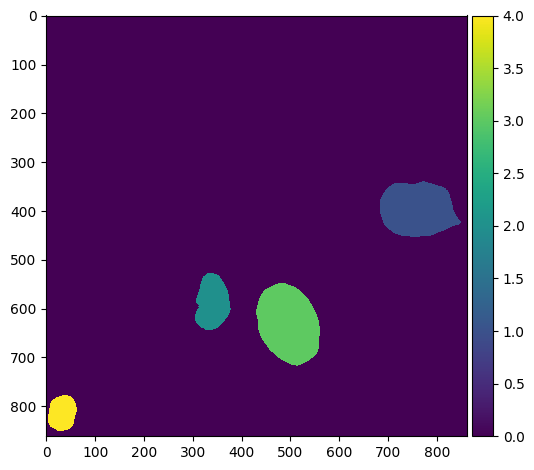

Cell:  2
Inclusion Area 1423.0
Max Inclusion Area: 358.0
Cell Area: 16503.0
Ratio: 0.08622674665212386
Max Inclusion/Cell Area: 0.02169302551051324
Average Inclusion/Cell Area 0.007089620069078349


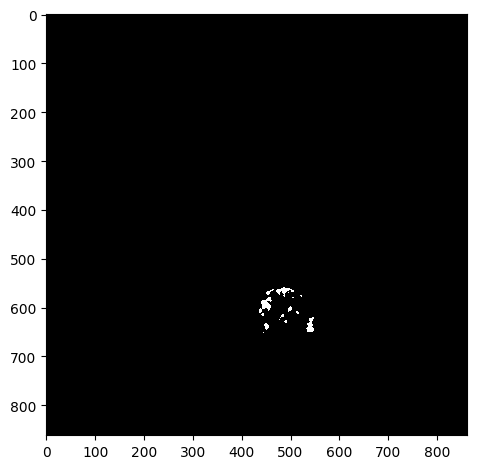

1K_PFF_HTRA1_Hoechst_20x_02.czi


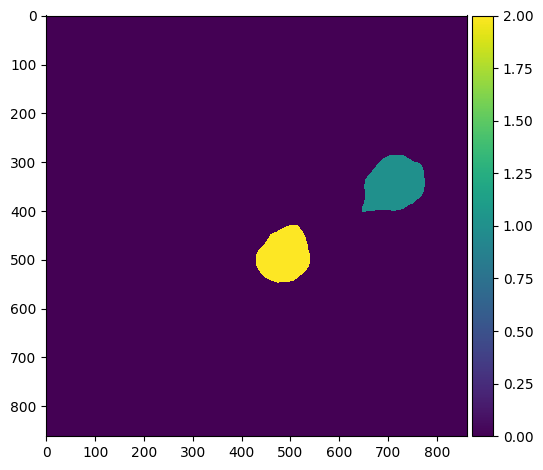

Cell:  0
Inclusion Area 1261.0
Max Inclusion Area: 307.0
Cell Area: 11510.0
Ratio: 0.10955690703735882
Max Inclusion/Cell Area: 0.02667245873153779
Average Inclusion/Cell Area 0.00899218071242398


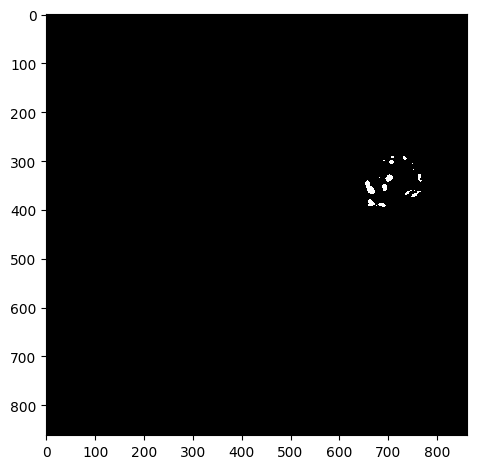

Cell:  1
Inclusion Area 417.0
Max Inclusion Area: 180.0
Cell Area: 9742.0
Ratio: 0.04280435228905769
Max Inclusion/Cell Area: 0.018476698829809075
Average Inclusion/Cell Area 0.013925956340244986


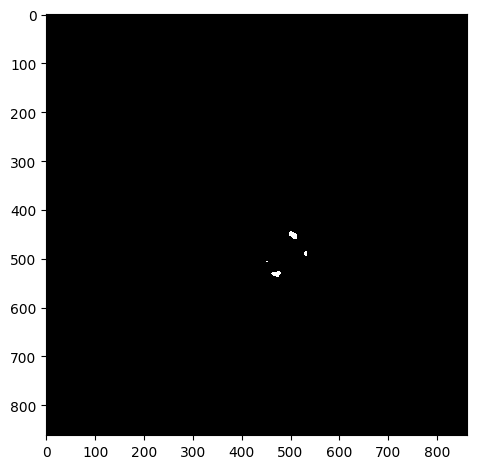

1K_PFF_HTRA1_Hoechst_20x_03.czi


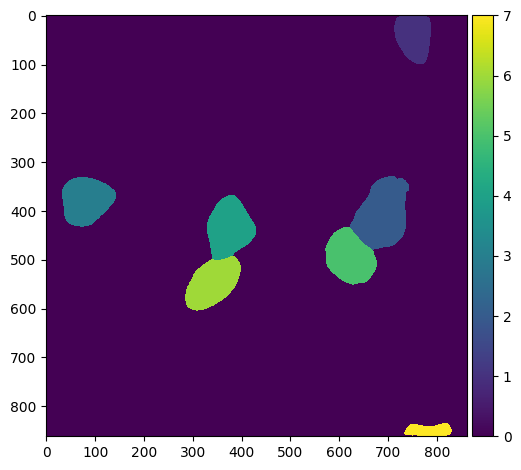

Cell:  1
Inclusion Area 2143.0
Max Inclusion Area: 745.0
Cell Area: 12627.0
Ratio: 0.16971568860378555
Max Inclusion/Cell Area: 0.059000554367624934
Average Inclusion/Cell Area 0.010468638631503921


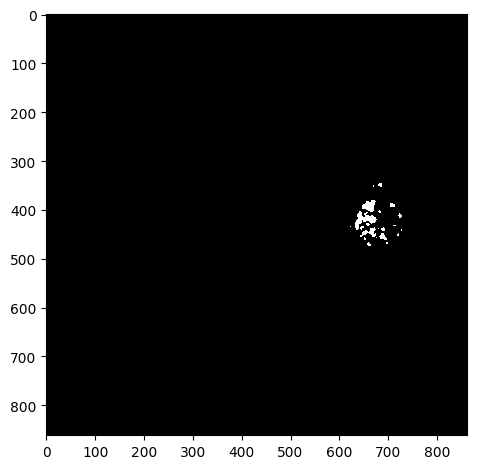

Cell:  3
Inclusion Area 1070.0
Max Inclusion Area: 790.0
Cell Area: 9333.0
Ratio: 0.1146469516768456
Max Inclusion/Cell Area: 0.0846458802100075
Average Inclusion/Cell Area 0.011068252437587056


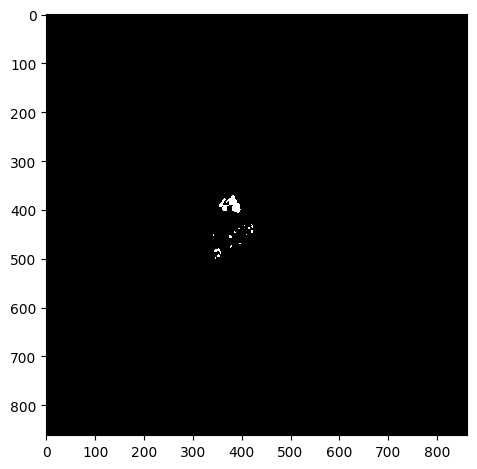

Cell:  4
Inclusion Area 675.0
Max Inclusion Area: 255.0
Cell Area: 8770.0
Ratio: 0.07696693272519954
Max Inclusion/Cell Area: 0.029076396807297605
Average Inclusion/Cell Area 0.006851871047994195


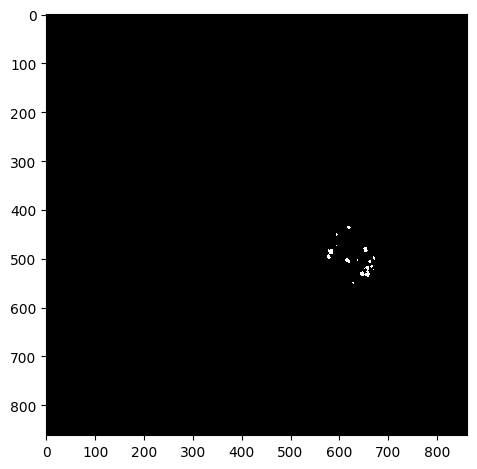

Cell:  5
Inclusion Area 2497.0
Max Inclusion Area: 2369.0
Cell Area: 8617.0
Ratio: 0.2897760241383312
Max Inclusion/Cell Area: 0.27492166647325056
Average Inclusion/Cell Area 0.04781246373447836


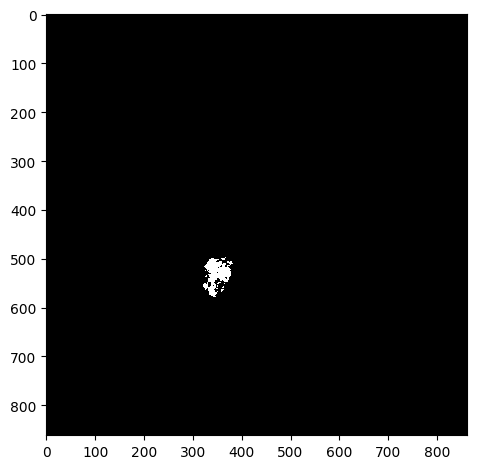

1K_PFF_HTRA1_Hoechst_20x_04.czi


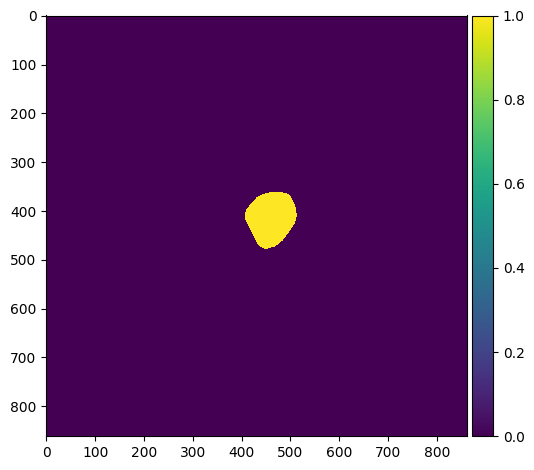

Cell:  0
Inclusion Area 1676.0
Max Inclusion Area: 989.0
Cell Area: 8982.0
Ratio: 0.18659541304831886
Max Inclusion/Cell Area: 0.11010910710309509
Average Inclusion/Cell Area 0.016942976862816542


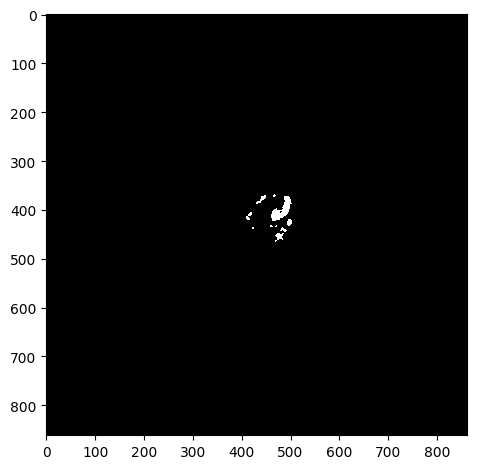

1K_PFF_HTRA1_Hoechst_20x_05.czi


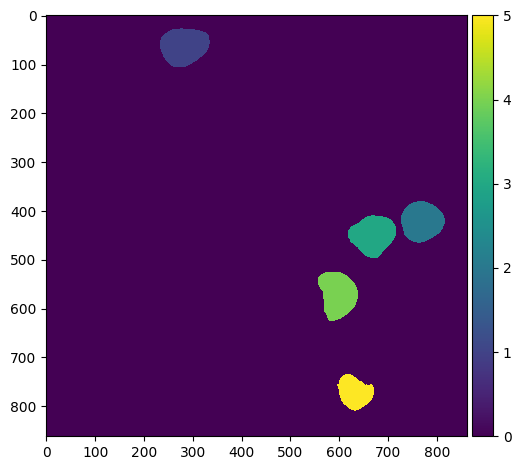

Cell:  2
Inclusion Area 1506.0
Max Inclusion Area: 1052.0
Cell Area: 6107.0
Ratio: 0.24660225970198132
Max Inclusion/Cell Area: 0.17226133944653677
Average Inclusion/Cell Area 0.06046340265269363


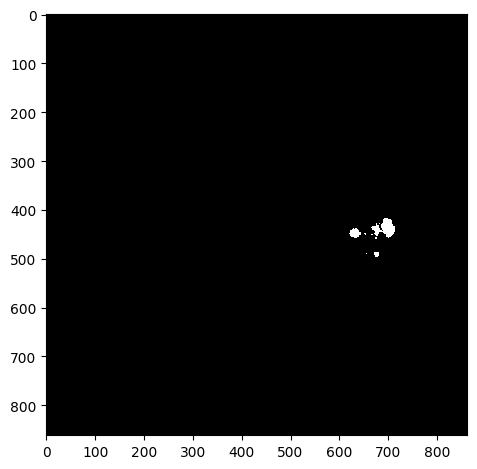

1K_PFF_HTRA1_Hoechst_20x_06.czi


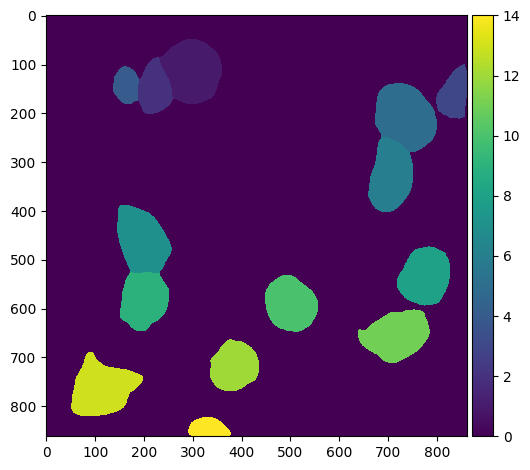

Cell:  1
Inclusion Area 1505.0
Max Inclusion Area: 1069.0
Cell Area: 5890.0
Ratio: 0.25551782682512736
Max Inclusion/Cell Area: 0.18149405772495755
Average Inclusion/Cell Area 0.02536502546689304


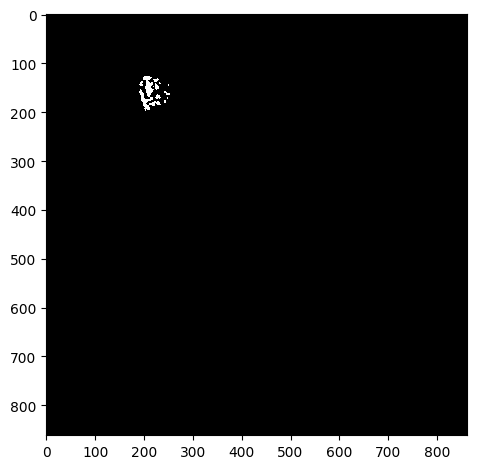

Cell:  2
Inclusion Area 196.0
Max Inclusion Area: 153.0
Cell Area: 4988.0
Ratio: 0.03929430633520449
Max Inclusion/Cell Area: 0.030673616680032077
Average Inclusion/Cell Area 0.012897620956963379


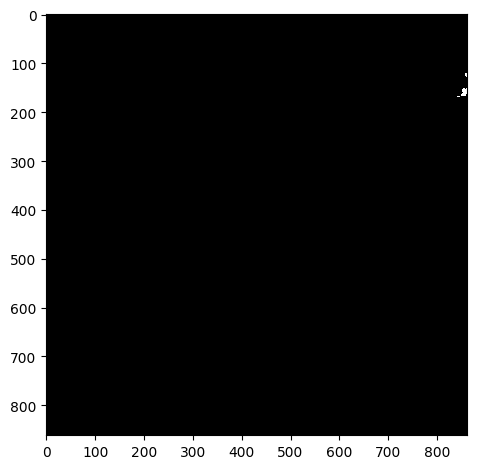

Cell:  3
Inclusion Area 423.0
Max Inclusion Area: 91.0
Cell Area: 3285.0
Ratio: 0.12876712328767123
Max Inclusion/Cell Area: 0.027701674277016742
Average Inclusion/Cell Area 0.013664806358870284


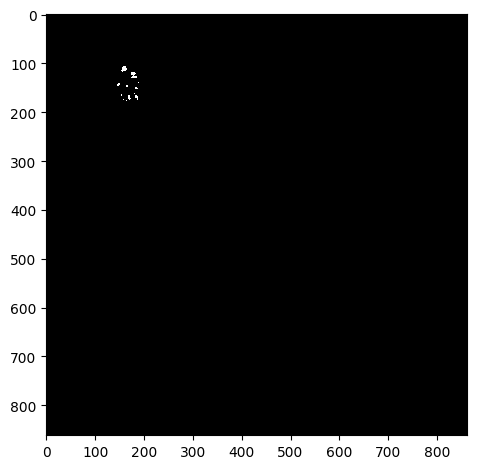

Cell:  5
Inclusion Area 2548.0
Max Inclusion Area: 1254.0
Cell Area: 10668.0
Ratio: 0.2388451443569554
Max Inclusion/Cell Area: 0.11754780652418448
Average Inclusion/Cell Area 0.023809523809523808


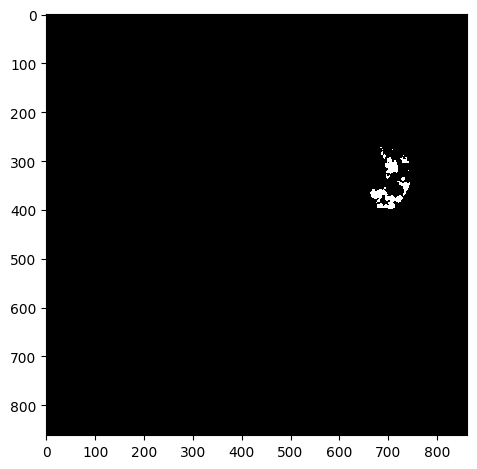

Cell:  6
Inclusion Area 392.0
Max Inclusion Area: 172.0
Cell Area: 11467.0
Ratio: 0.03418505276009418
Max Inclusion/Cell Area: 0.014999563966163774
Average Inclusion/Cell Area 0.006680038370977587


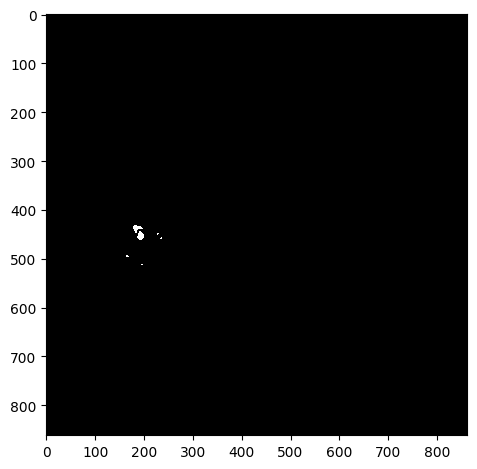

Cell:  7
Inclusion Area 114.0
Max Inclusion Area: 114.0
Cell Area: 10088.0
Ratio: 0.011300555114988104
Max Inclusion/Cell Area: 0.011300555114988104
Average Inclusion/Cell Area 0.011300555114988104


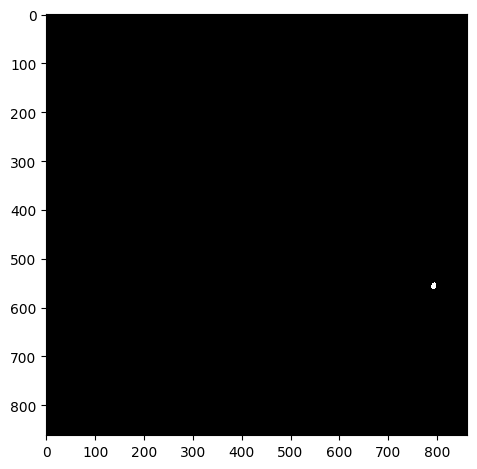

Cell:  9
Inclusion Area 2002.0
Max Inclusion Area: 1051.0
Cell Area: 9619.0
Ratio: 0.2081297432165506
Max Inclusion/Cell Area: 0.10926291714315417
Average Inclusion/Cell Area 0.012884655369581038


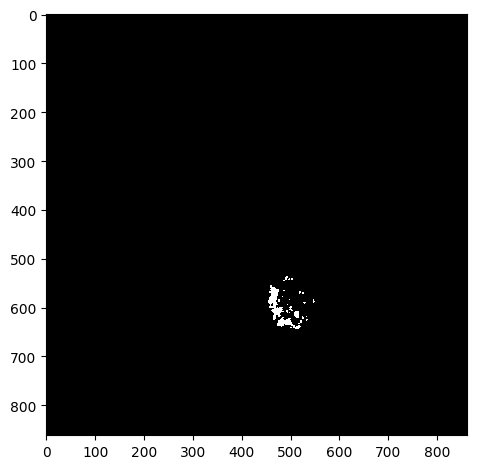

Cell:  10
Inclusion Area 159.0
Max Inclusion Area: 148.0
Cell Area: 11089.0
Ratio: 0.014338533682027234
Max Inclusion/Cell Area: 0.013346559653710885
Average Inclusion/Cell Area 0.007169266841013617


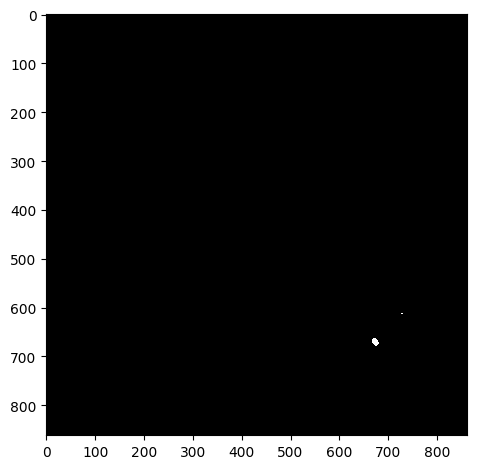

Cell:  11
Inclusion Area 440.0
Max Inclusion Area: 271.0
Cell Area: 8245.0
Ratio: 0.053365676167374164
Max Inclusion/Cell Area: 0.03286840509399636
Average Inclusion/Cell Area 0.0171417020416414


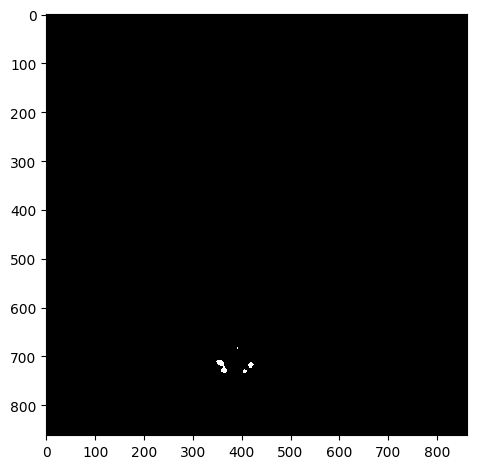

Cell:  12
Inclusion Area 1277.0
Max Inclusion Area: 337.0
Cell Area: 12248.0
Ratio: 0.10426192031352058
Max Inclusion/Cell Area: 0.027514696276943175
Average Inclusion/Cell Area 0.007342306615657367


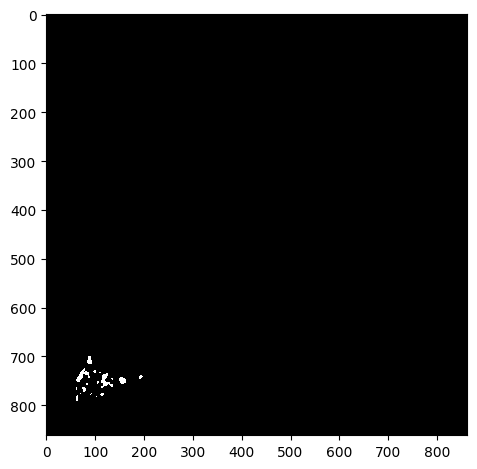

1K_PFF_HTRA1_Hoechst_20x_07.czi


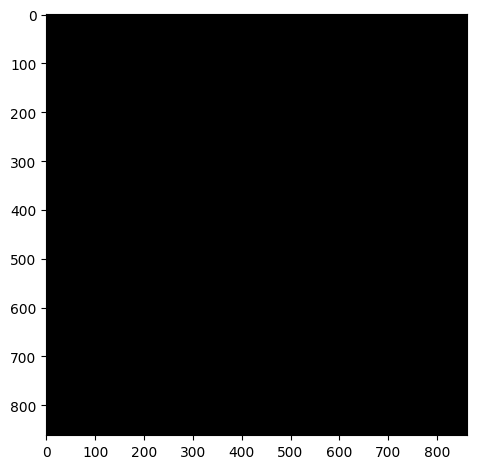

1K_PFF_HTRA1_Hoechst_20x_08.czi


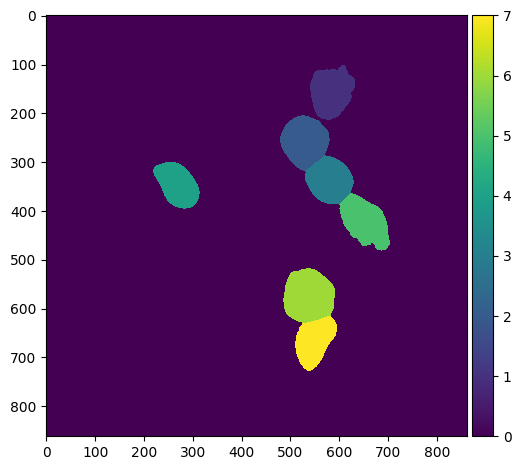

Cell:  0
Inclusion Area 818.0
Max Inclusion Area: 232.0
Cell Area: 7599.0
Ratio: 0.10764574286090275
Max Inclusion/Cell Area: 0.030530332938544544
Average Inclusion/Cell Area 0.00798688086489113


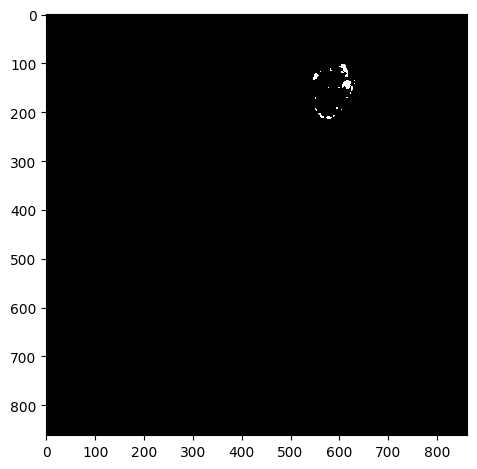

Cell:  5
Inclusion Area 466.0
Max Inclusion Area: 449.0
Cell Area: 9427.0
Ratio: 0.04943248117110428
Max Inclusion/Cell Area: 0.04762915031293094
Average Inclusion/Cell Area 0.04762915031293094


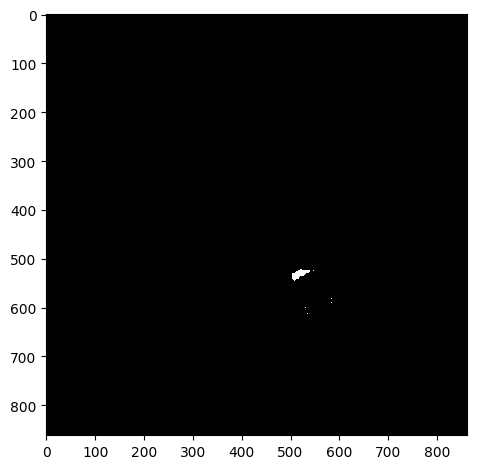

1K_PFF_HTRA1_Hoechst_20x_09.czi


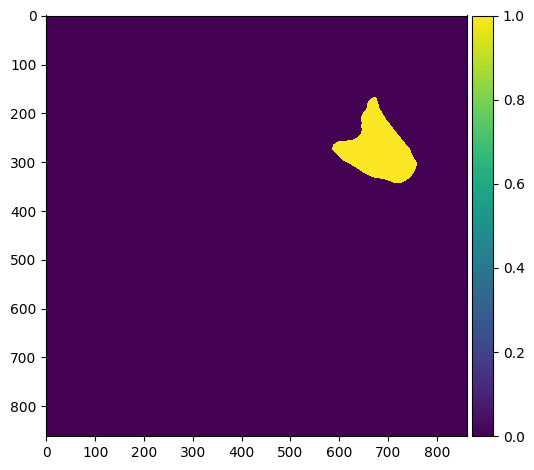

Cell:  0
Inclusion Area 1463.0
Max Inclusion Area: 475.0
Cell Area: 15177.0
Ratio: 0.09639586215984713
Max Inclusion/Cell Area: 0.03129735784410621
Average Inclusion/Cell Area 0.0058270738617645125


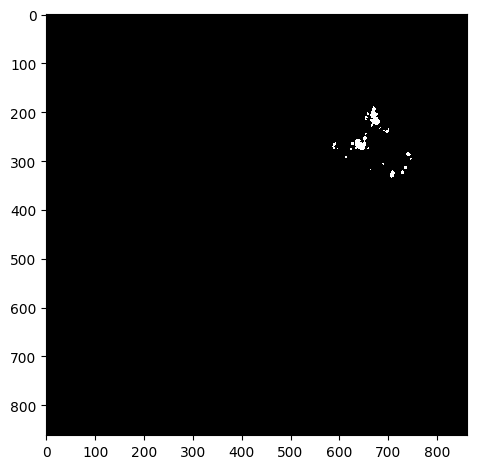

1K_PFF_HTRA1_Hoechst_20x_10.czi


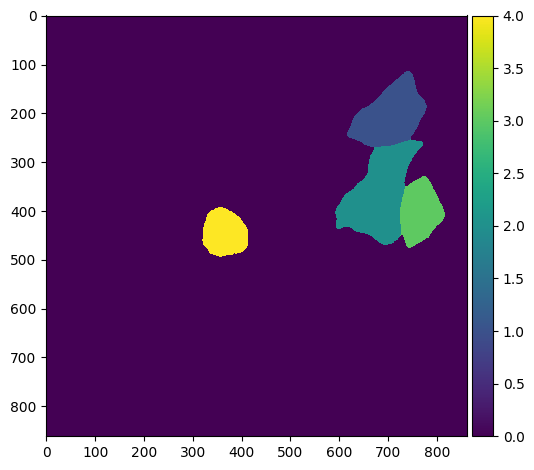

Cell:  1
Inclusion Area 1699.0
Max Inclusion Area: 1254.0
Cell Area: 20449.0
Ratio: 0.08308474742041176
Max Inclusion/Cell Area: 0.06132329209252286
Average Inclusion/Cell Area 0.010330578512396695


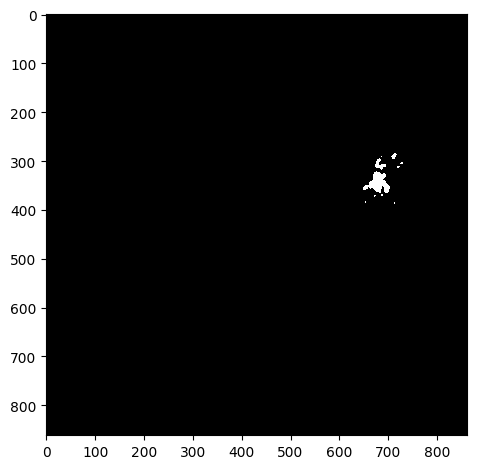

Cell:  2
Inclusion Area 1507.0
Max Inclusion Area: 1168.0
Cell Area: 9224.0
Ratio: 0.16337814397224631
Max Inclusion/Cell Area: 0.1266261925411969
Average Inclusion/Cell Area 0.016864218945745395


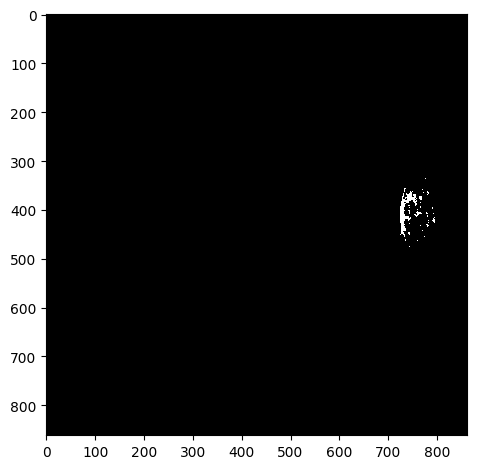

Cell:  3
Inclusion Area 1153.0
Max Inclusion Area: 371.0
Cell Area: 7411.0
Ratio: 0.15557954392119822
Max Inclusion/Cell Area: 0.05006072055053299
Average Inclusion/Cell Area 0.01892457158278235


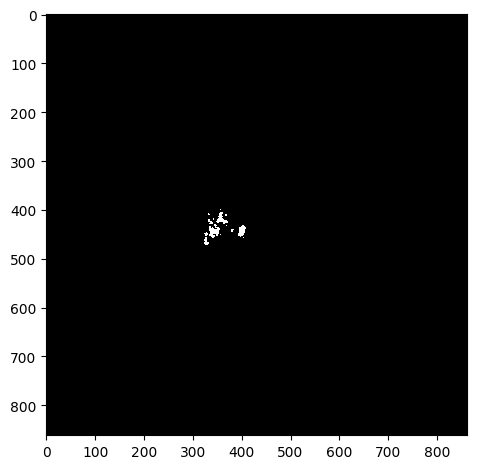

1K_PFF_no_HTRA1_Hoechst_20x_01.czi


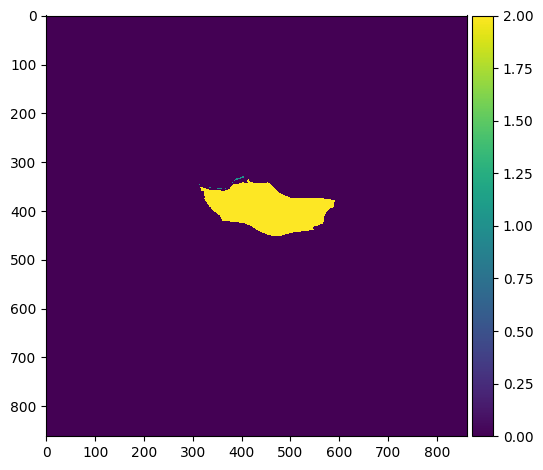

Cell:  1
Inclusion Area 109.0
Max Inclusion Area: 97.0
Cell Area: 18569.0
Ratio: 0.005869998384404114
Max Inclusion/Cell Area: 0.0052237600301577895
Average Inclusion/Cell Area 0.002934999192202057


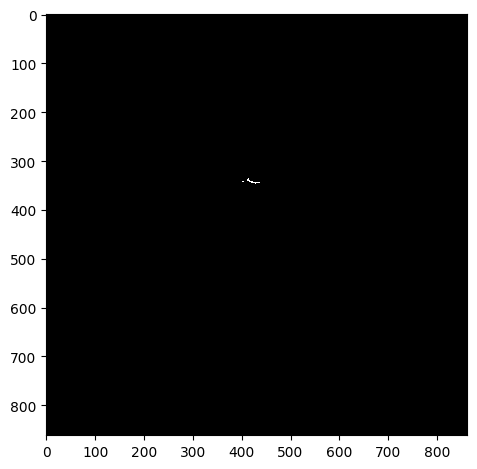

1K_PFF_no_HTRA1_Hoechst_20x_02.czi


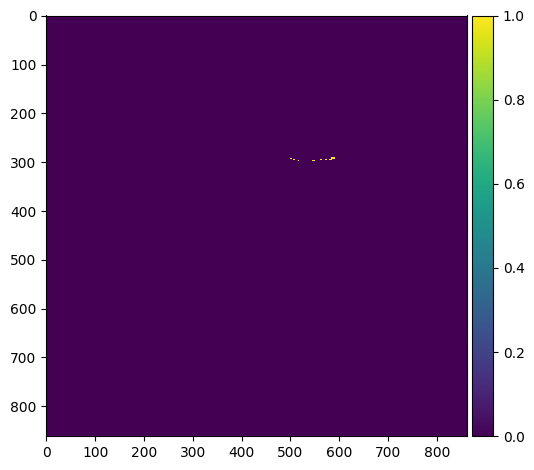

1K_PFF_no_HTRA1_Hoechst_20x_03.czi


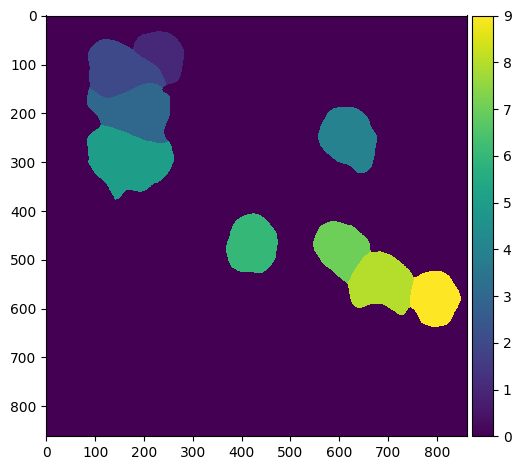

Cell:  2
Inclusion Area 3300.0
Max Inclusion Area: 2687.0
Cell Area: 13920.0
Ratio: 0.23706896551724138
Max Inclusion/Cell Area: 0.1930316091954023
Average Inclusion/Cell Area 0.01650246305418719


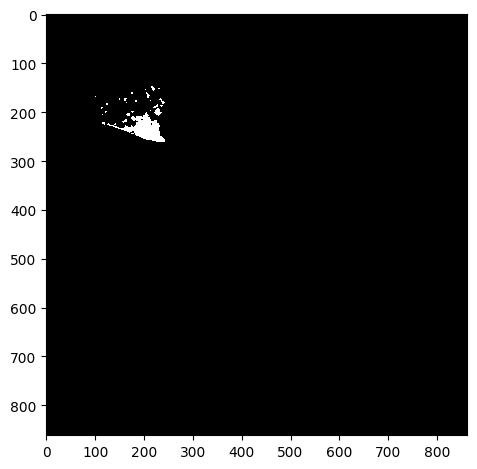

Cell:  3
Inclusion Area 2693.0
Max Inclusion Area: 2214.0
Cell Area: 11823.0
Ratio: 0.2277763680960839
Max Inclusion/Cell Area: 0.18726211621415884
Average Inclusion/Cell Area 0.028376892497674024


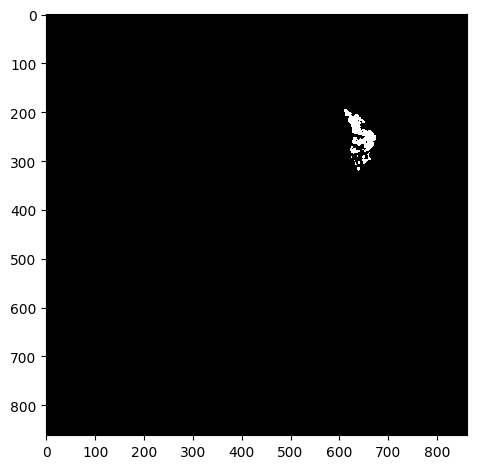

Cell:  4
Inclusion Area 757.0
Max Inclusion Area: 409.0
Cell Area: 17652.0
Ratio: 0.04288465896215726
Max Inclusion/Cell Area: 0.023170179016542034
Average Inclusion/Cell Area 0.004101518241559031


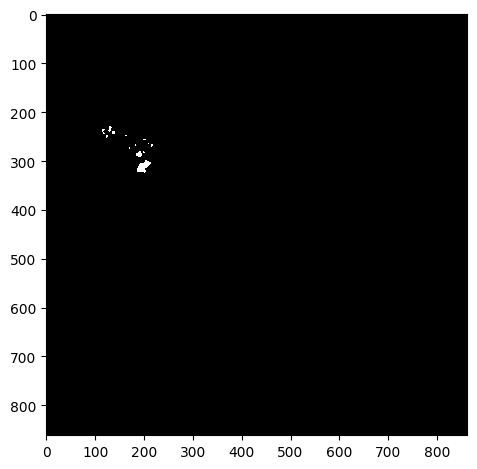

Cell:  8
Inclusion Area 178.0
Max Inclusion Area: 56.0
Cell Area: 9078.0
Ratio: 0.0196078431372549
Max Inclusion/Cell Area: 0.006168759638686935
Average Inclusion/Cell Area 0.004901960784313725


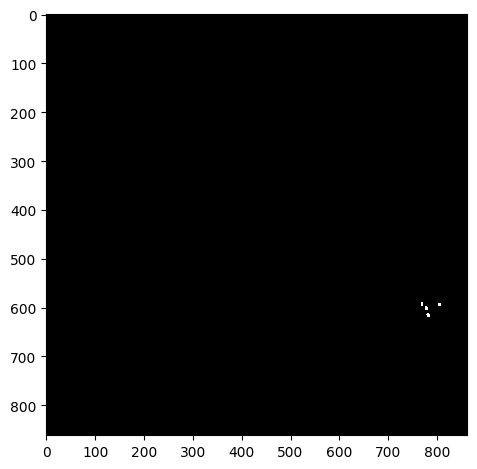

1K_PFF_no_HTRA1_Hoechst_20x_04.czi


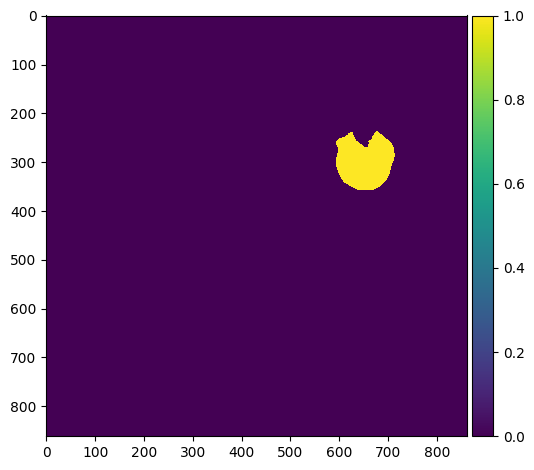

Cell:  0
Inclusion Area 304.0
Max Inclusion Area: 304.0
Cell Area: 10950.0
Ratio: 0.02776255707762557
Max Inclusion/Cell Area: 0.02776255707762557
Average Inclusion/Cell Area 0.02776255707762557


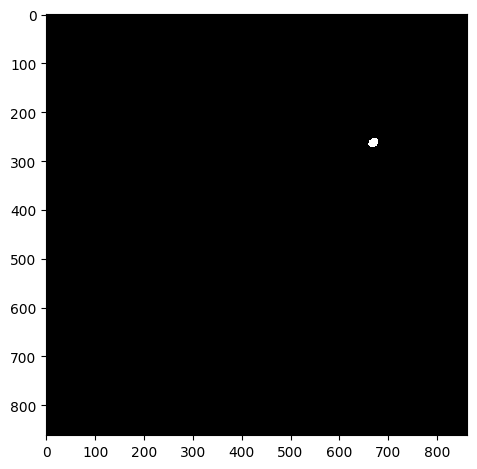

1K_PFF_no_HTRA1_Hoechst_20x_05.czi


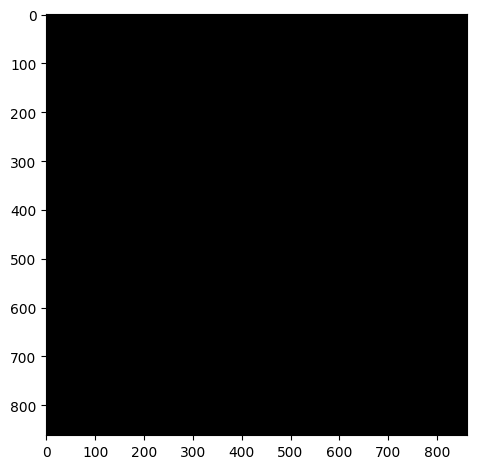

1K_PFF_no_HTRA1_Hoechst_20x_06.czi


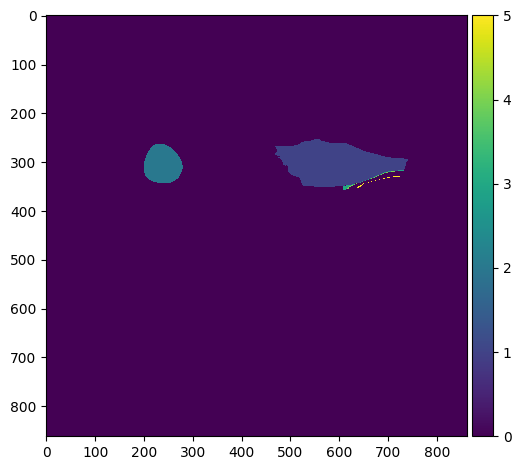

Cell:  0
Inclusion Area 415.0
Max Inclusion Area: 209.0
Cell Area: 16836.0
Ratio: 0.024649560465668807
Max Inclusion/Cell Area: 0.012413875029698266
Average Inclusion/Cell Area 0.008117525936485308


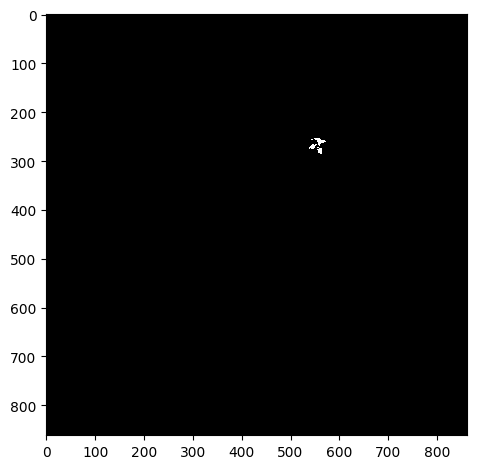

1K_PFF_no_HTRA1_Hoechst_20x_07.czi


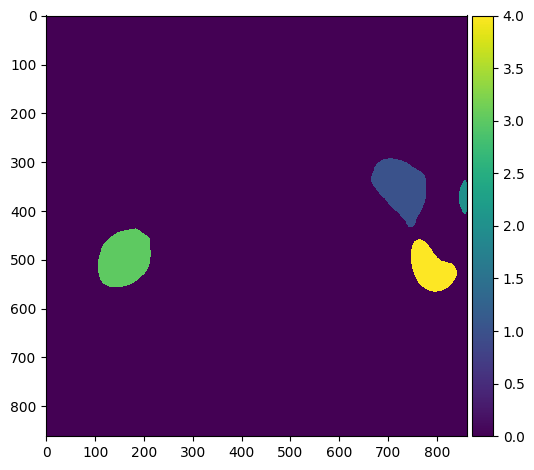

Cell:  0
Inclusion Area 528.0
Max Inclusion Area: 92.0
Cell Area: 10228.0
Ratio: 0.05162299569808369
Max Inclusion/Cell Area: 0.00899491591709034
Average Inclusion/Cell Area 0.004435240160699684


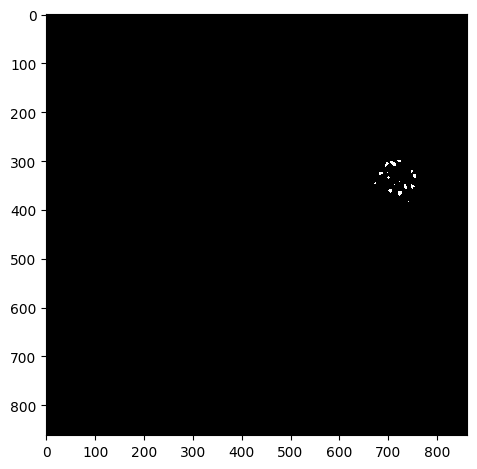

1K_PFF_no_HTRA1_Hoechst_20x_08.czi


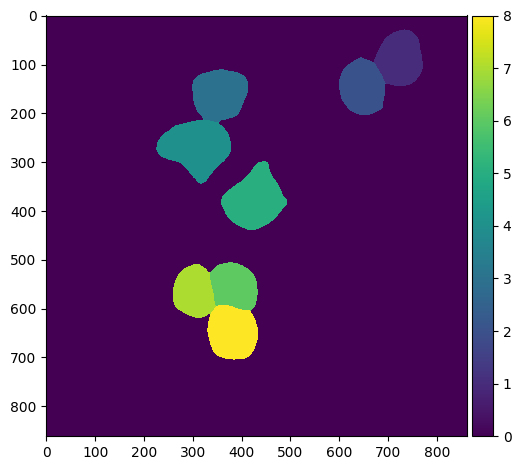

Cell:  4
Inclusion Area 1021.0
Max Inclusion Area: 305.0
Cell Area: 11838.0
Ratio: 0.08624767697246156
Max Inclusion/Cell Area: 0.02576448724446697
Average Inclusion/Cell Area 0.014374612828743593


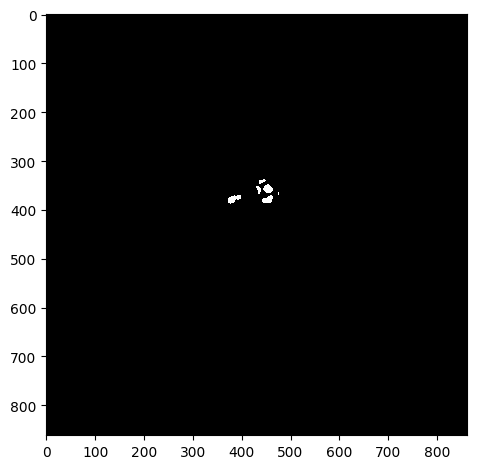

Cell:  5
Inclusion Area 293.0
Max Inclusion Area: 269.0
Cell Area: 7644.0
Ratio: 0.03833071690214547
Max Inclusion/Cell Area: 0.03519099947671376
Average Inclusion/Cell Area 0.019165358451072735


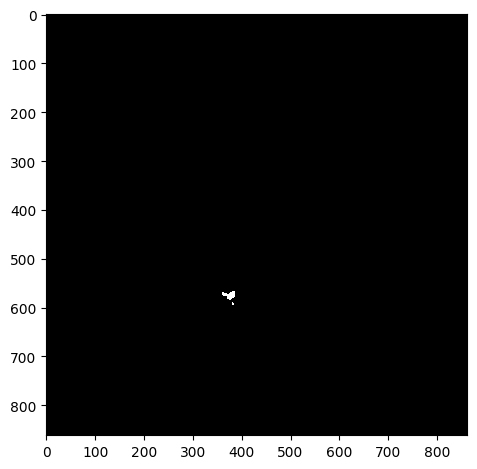

Cell:  7
Inclusion Area 173.0
Max Inclusion Area: 110.0
Cell Area: 9546.0
Ratio: 0.018122773936727427
Max Inclusion/Cell Area: 0.011523151058034779
Average Inclusion/Cell Area 0.005936168726866401


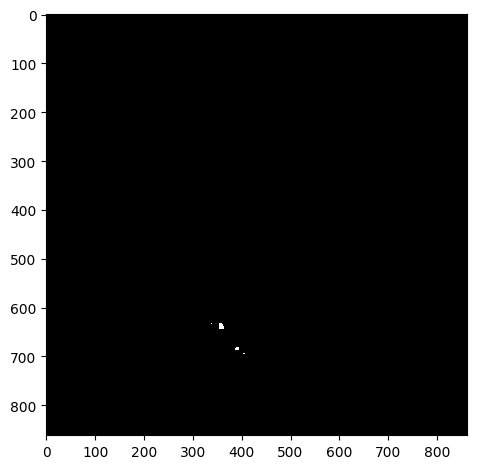

1K_PFF_no_HTRA1_Hoechst_20x_09.czi


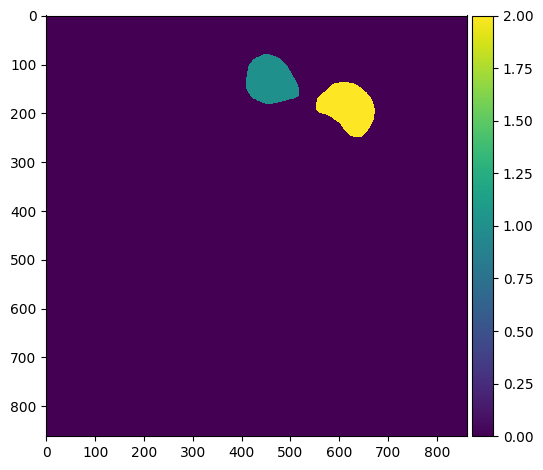

Cell:  0
Inclusion Area 616.0
Max Inclusion Area: 588.0
Cell Area: 8376.0
Ratio: 0.07354345749761222
Max Inclusion/Cell Area: 0.07020057306590258
Average Inclusion/Cell Area 0.02447468958930277


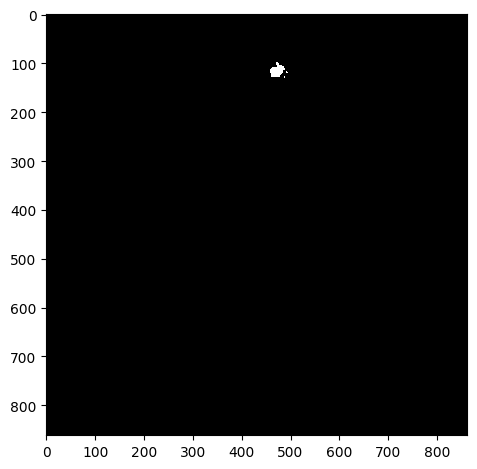

Cell:  1
Inclusion Area 599.0
Max Inclusion Area: 375.0
Cell Area: 9087.0
Ratio: 0.06591834488830196
Max Inclusion/Cell Area: 0.041267745130406076
Average Inclusion/Cell Area 0.01647958622207549


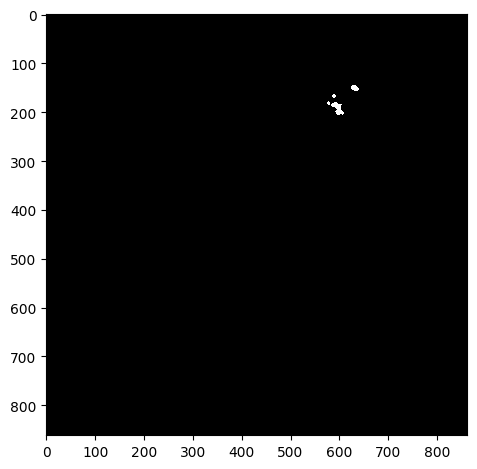

1K_PFF_no_HTRA1_Hoechst_20x_10.czi


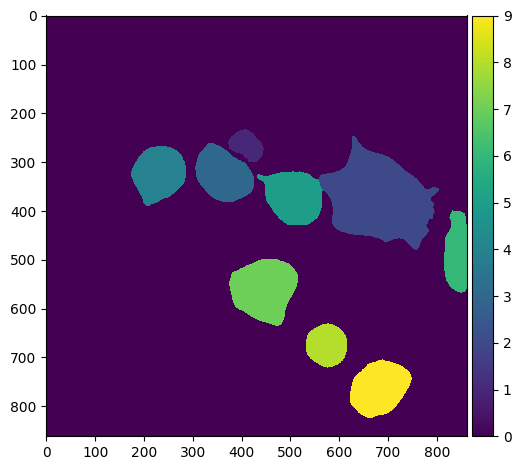

Cell:  4
Inclusion Area 2362.0
Max Inclusion Area: 790.0
Cell Area: 10847.0
Ratio: 0.21775606158384808
Max Inclusion/Cell Area: 0.07283119756614732
Average Inclusion/Cell Area 0.027023600995667005


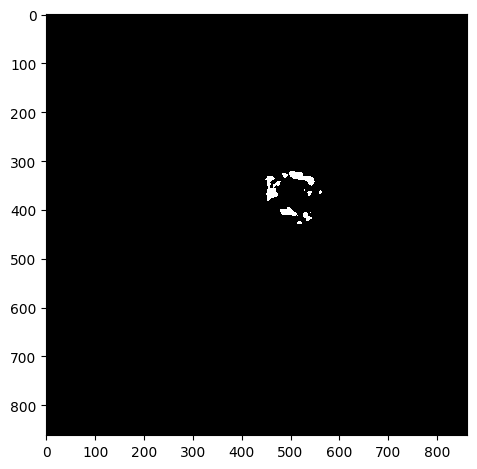

Cell:  6
Inclusion Area 325.0
Max Inclusion Area: 63.0
Cell Area: 13983.0
Ratio: 0.023242508760637916
Max Inclusion/Cell Area: 0.004505470928985196
Average Inclusion/Cell Area 0.002842737609954945


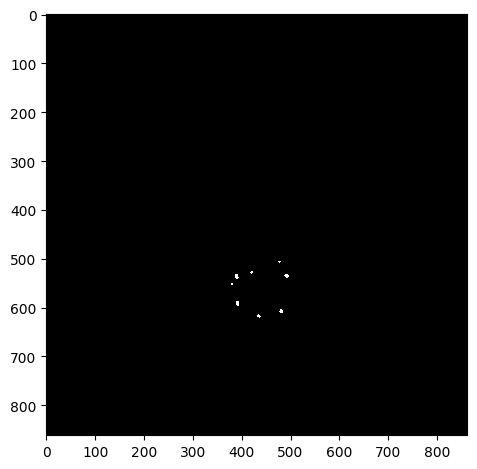

Cell:  7
Inclusion Area 576.0
Max Inclusion Area: 464.0
Cell Area: 5986.0
Ratio: 0.0962245238890745
Max Inclusion/Cell Area: 0.07751419979953224
Average Inclusion/Cell Area 0.02376378215836953


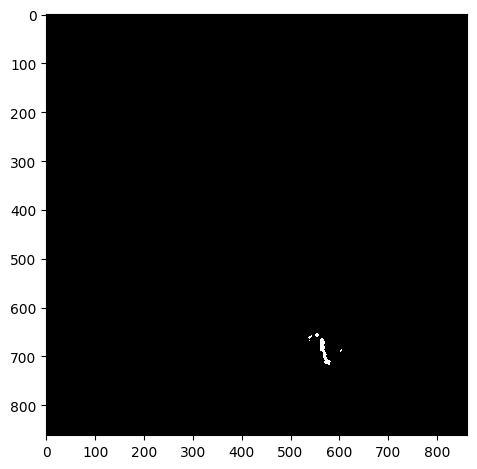

wt_PFF_HTRA1_Hoechst_20x_01.czi


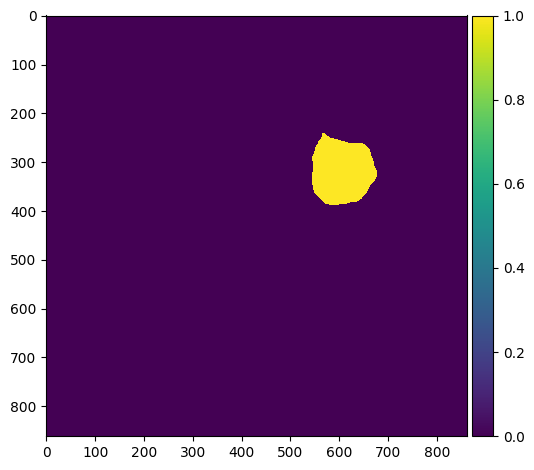

Cell:  0
Inclusion Area 236.0
Max Inclusion Area: 228.0
Cell Area: 14776.0
Ratio: 0.01597184623714131
Max Inclusion/Cell Area: 0.015430427720628045
Average Inclusion/Cell Area 0.015430427720628045


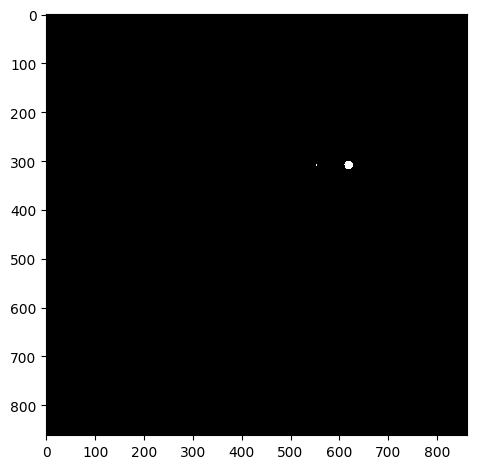

wt_PFF_HTRA1_Hoechst_20x_02.czi


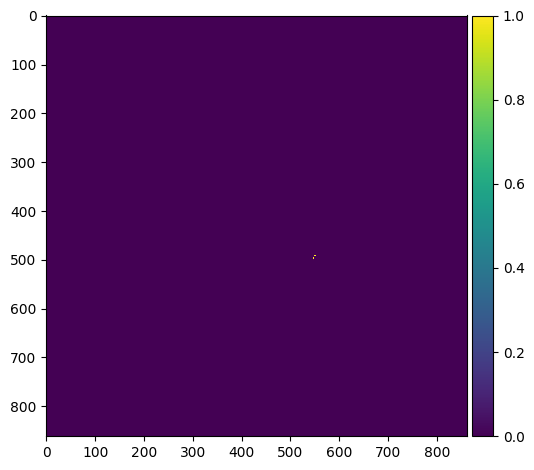

wt_PFF_HTRA1_Hoechst_20x_03.czi


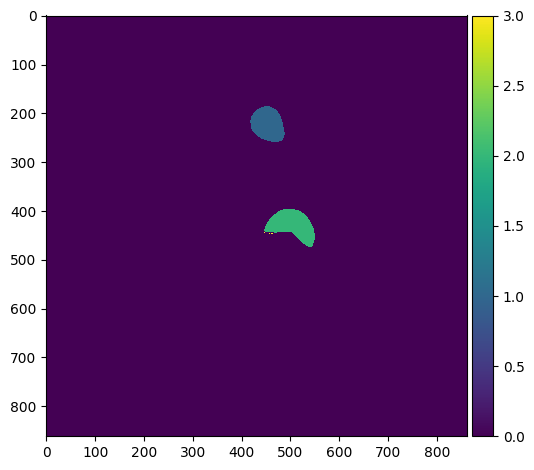

wt_PFF_HTRA1_Hoechst_20x_04.czi


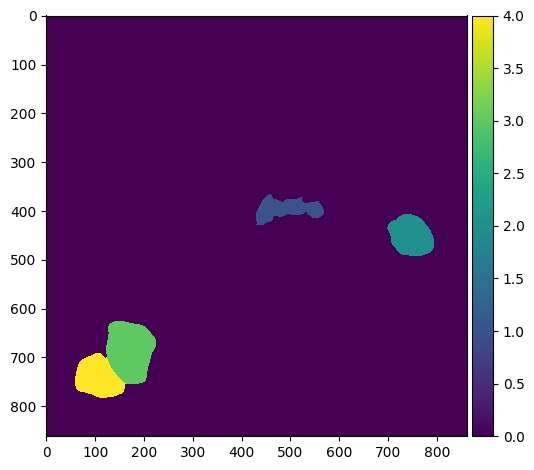

Cell:  0
Inclusion Area 617.0
Max Inclusion Area: 354.0
Cell Area: 4825.0
Ratio: 0.1278756476683938
Max Inclusion/Cell Area: 0.07336787564766839
Average Inclusion/Cell Area 0.06321243523316063


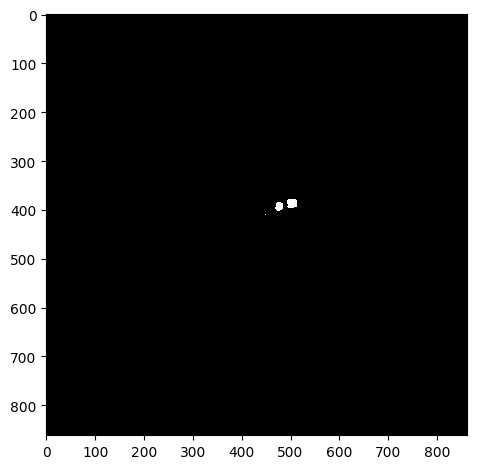

wt_PFF_HTRA1_Hoechst_20x_05.czi


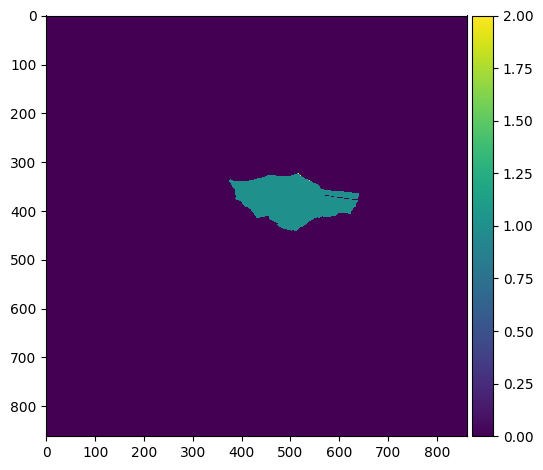

Cell:  0
Inclusion Area 1649.0
Max Inclusion Area: 1649.0
Cell Area: 18260.0
Ratio: 0.09030668127053669
Max Inclusion/Cell Area: 0.09030668127053669
Average Inclusion/Cell Area 0.09030668127053669


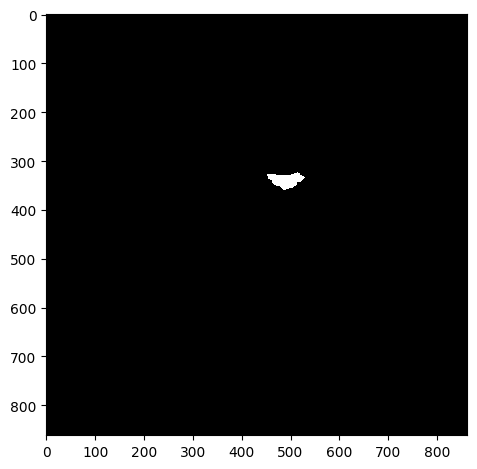

wt_PFF_HTRA1_Hoechst_20x_06.czi


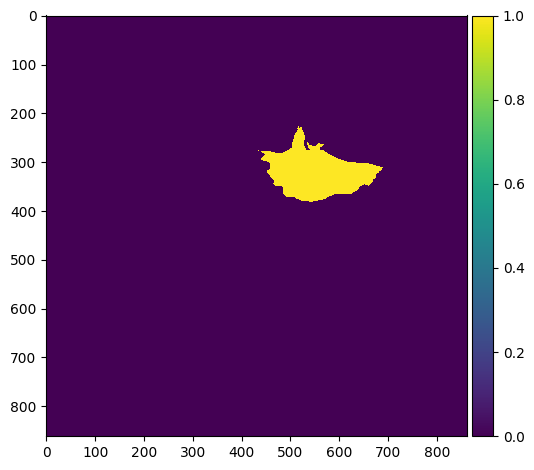

Cell:  0
Inclusion Area 217.0
Max Inclusion Area: 73.0
Cell Area: 18623.0
Ratio: 0.011652257960586372
Max Inclusion/Cell Area: 0.003919884014390807
Average Inclusion/Cell Area 0.002778821886914031


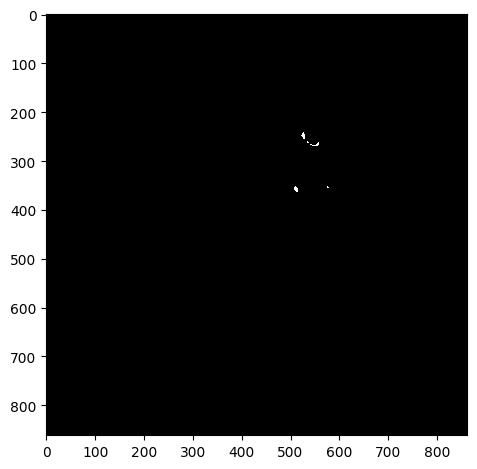

wt_PFF_HTRA1_Hoechst_20x_07.czi


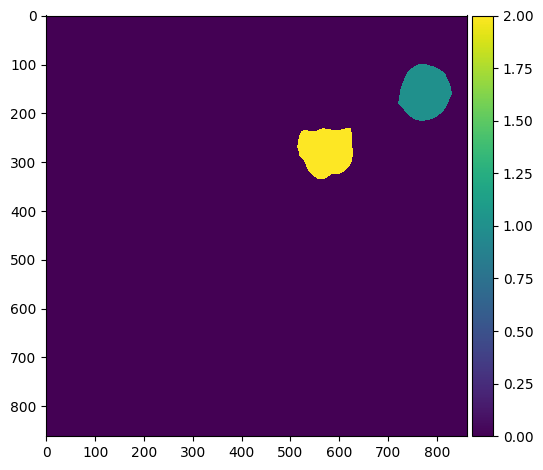

wt_PFF_HTRA1_Hoechst_20x_08.czi


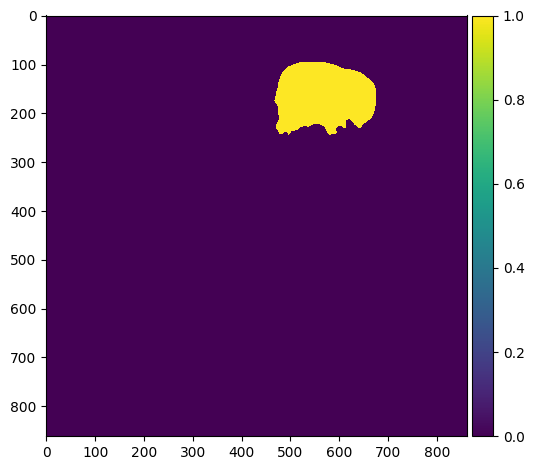

Cell:  0
Inclusion Area 3807.0
Max Inclusion Area: 1518.0
Cell Area: 24353.0
Ratio: 0.15632570935818996
Max Inclusion/Cell Area: 0.06233318277008993
Average Inclusion/Cell Area 0.007360000625717376


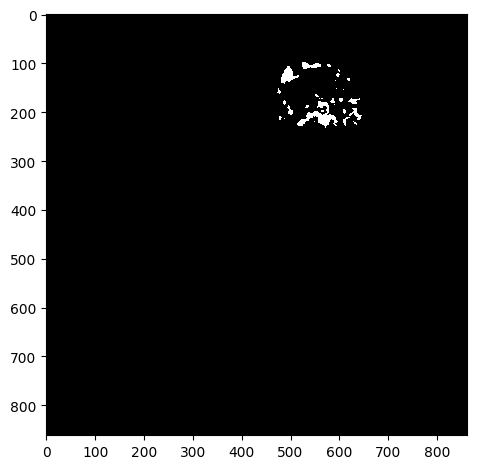

wt_PFF_HTRA1_Hoechst_20x_09.czi


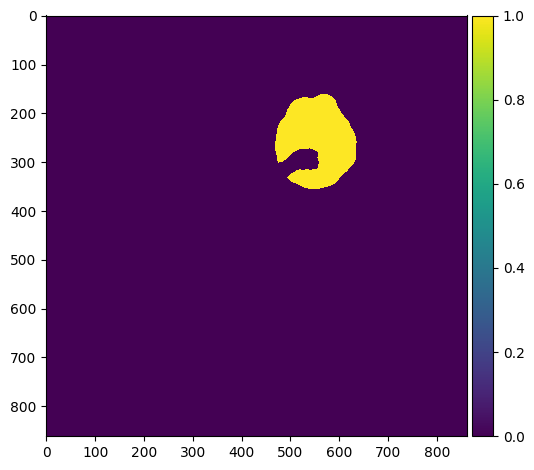

wt_PFF_HTRA1_Hoechst_20x_10.czi


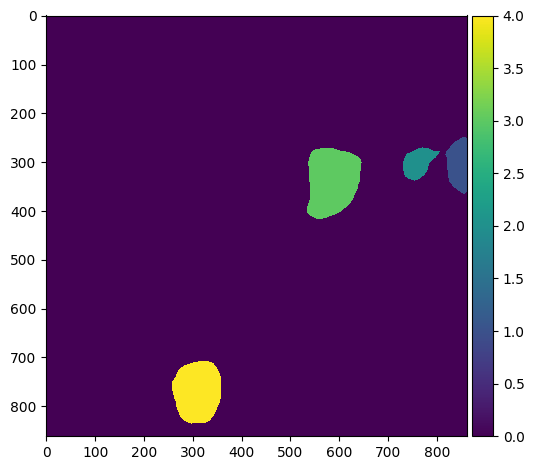

Cell:  2
Inclusion Area 718.0
Max Inclusion Area: 184.0
Cell Area: 12792.0
Ratio: 0.05612883051907442
Max Inclusion/Cell Area: 0.014383989993746092
Average Inclusion/Cell Area 0.004868099380294502


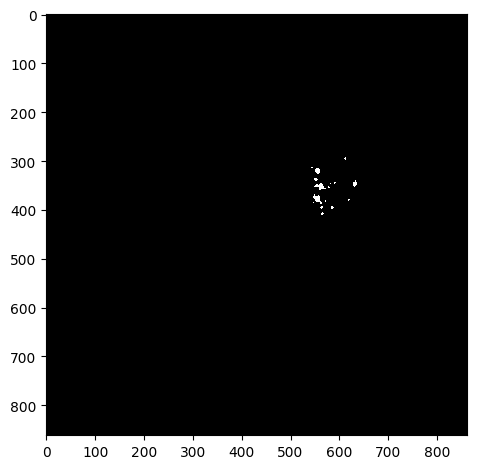

wt_PFF_no_HTRA1_Hoechst_20x_01.czi


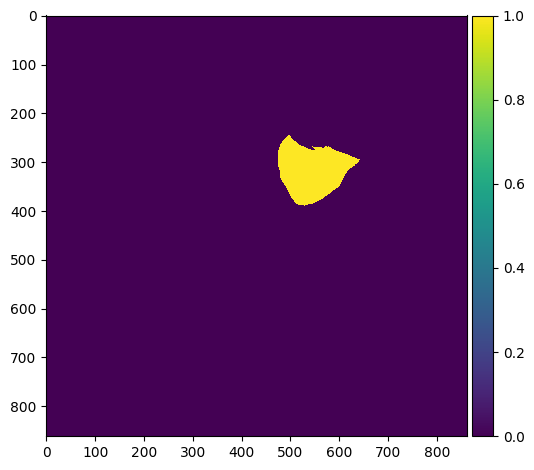

wt_PFF_no_HTRA1_Hoechst_20x_02.czi


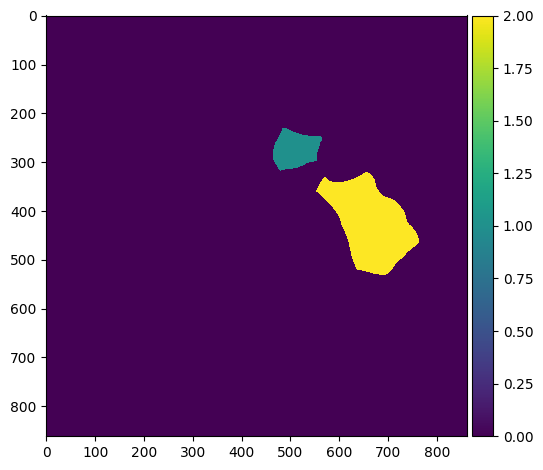

wt_PFF_no_HTRA1_Hoechst_20x_03.czi


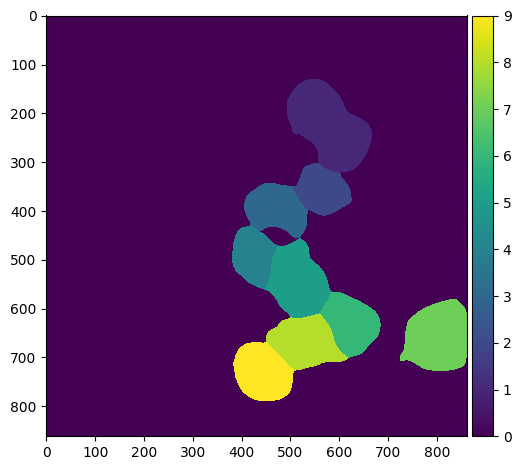

Cell:  0
Inclusion Area 2591.0
Max Inclusion Area: 1221.0
Cell Area: 20948.0
Ratio: 0.12368722551078862
Max Inclusion/Cell Area: 0.0582871873209853
Average Inclusion/Cell Area 0.017540031097411278


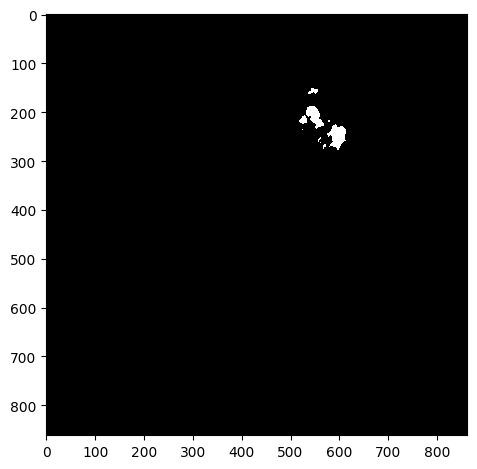

Cell:  2
Inclusion Area 485.0
Max Inclusion Area: 285.0
Cell Area: 10502.0
Ratio: 0.04618167968006094
Max Inclusion/Cell Area: 0.027137688059417252
Average Inclusion/Cell Area 0.015298673268583762


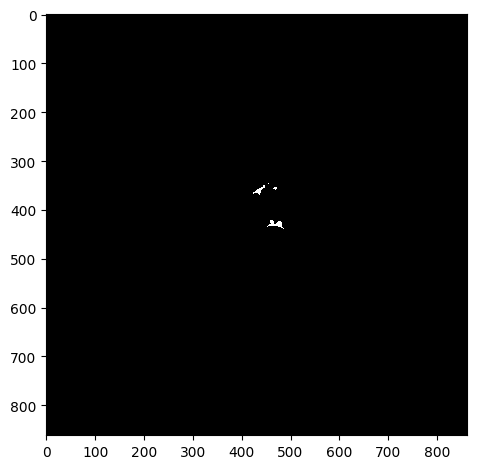

Cell:  3
Inclusion Area 984.0
Max Inclusion Area: 352.0
Cell Area: 8352.0
Ratio: 0.11781609195402298
Max Inclusion/Cell Area: 0.0421455938697318
Average Inclusion/Cell Area 0.012824606215410813


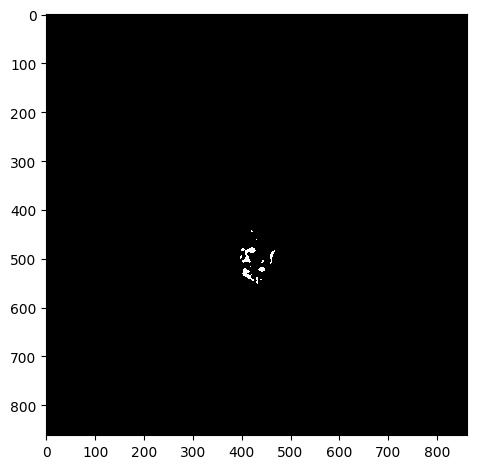

Cell:  4
Inclusion Area 758.0
Max Inclusion Area: 645.0
Cell Area: 14601.0
Ratio: 0.051914252448462435
Max Inclusion/Cell Area: 0.044175056502979246
Average Inclusion/Cell Area 0.025957126224231217


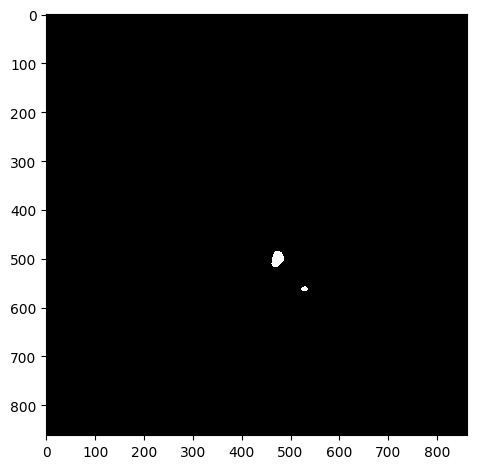

Cell:  7
Inclusion Area 730.0
Max Inclusion Area: 730.0
Cell Area: 12316.0
Ratio: 0.05927249106852874
Max Inclusion/Cell Area: 0.05927249106852874
Average Inclusion/Cell Area 0.05927249106852874


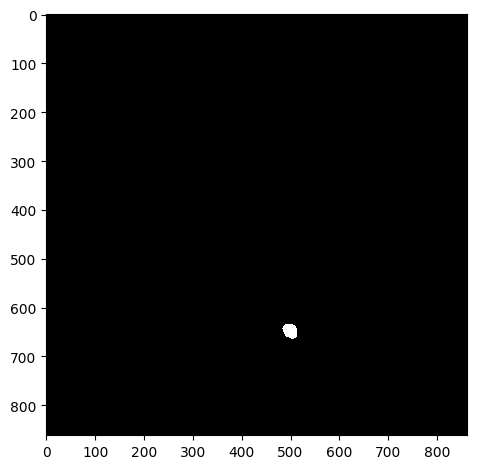

wt_PFF_no_HTRA1_Hoechst_20x_04.czi


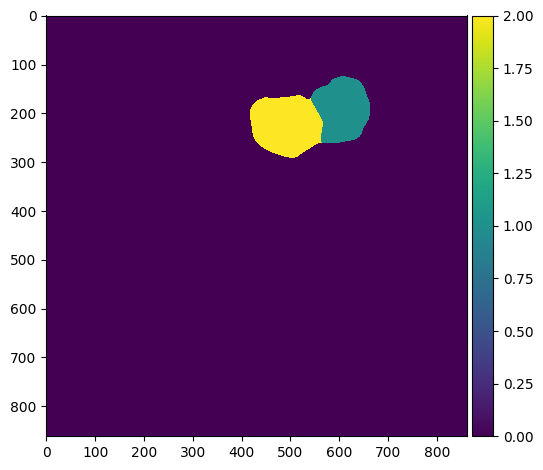

Cell:  0
Inclusion Area 2671.0
Max Inclusion Area: 1884.0
Cell Area: 12304.0
Ratio: 0.21708387516254876
Max Inclusion/Cell Area: 0.15312093628088427
Average Inclusion/Cell Area 0.03596391417425228


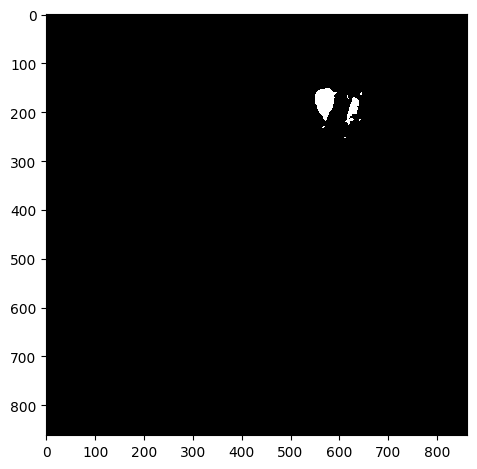

wt_PFF_no_HTRA1_Hoechst_20x_05.czi


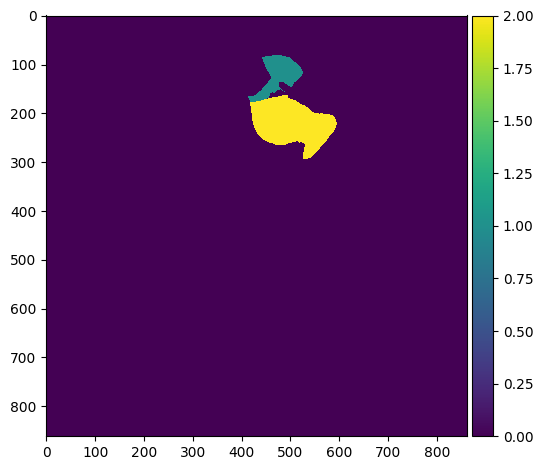

Cell:  0
Inclusion Area 1324.0
Max Inclusion Area: 425.0
Cell Area: 4889.0
Ratio: 0.2708120269993864
Max Inclusion/Cell Area: 0.08692984250357946
Average Inclusion/Cell Area 0.03313561055430558


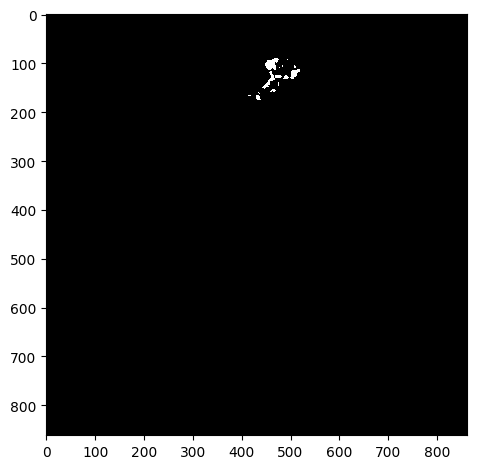

Cell:  1
Inclusion Area 686.0
Max Inclusion Area: 364.0
Cell Area: 13812.0
Ratio: 0.049666956269910224
Max Inclusion/Cell Area: 0.026353895163625834
Average Inclusion/Cell Area 0.009643788010425716


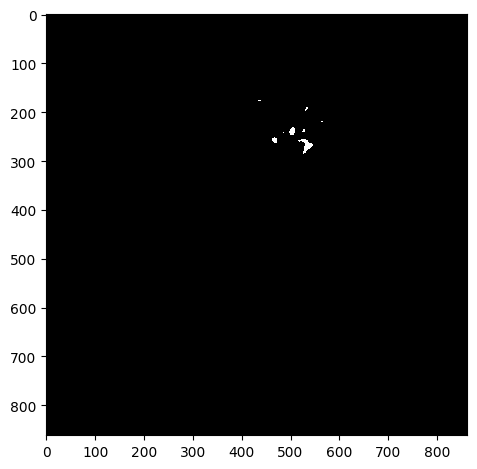

wt_PFF_no_HTRA1_Hoechst_20x_06.czi


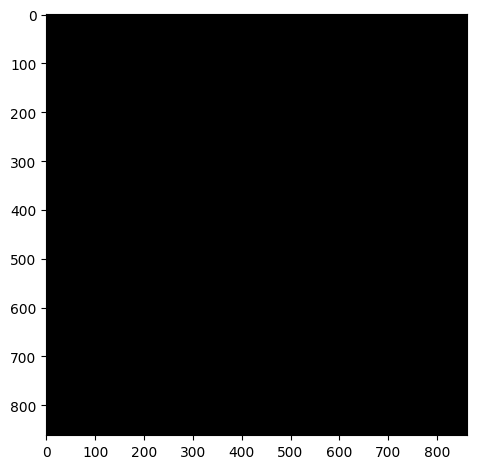

wt_PFF_no_HTRA1_Hoechst_20x_07.czi


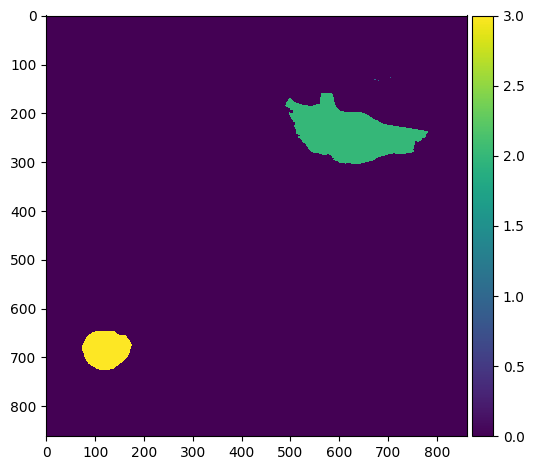

Cell:  5
Inclusion Area 1135.0
Max Inclusion Area: 1135.0
Cell Area: 22442.0
Ratio: 0.050574815078869975
Max Inclusion/Cell Area: 0.050574815078869975
Average Inclusion/Cell Area 0.050574815078869975


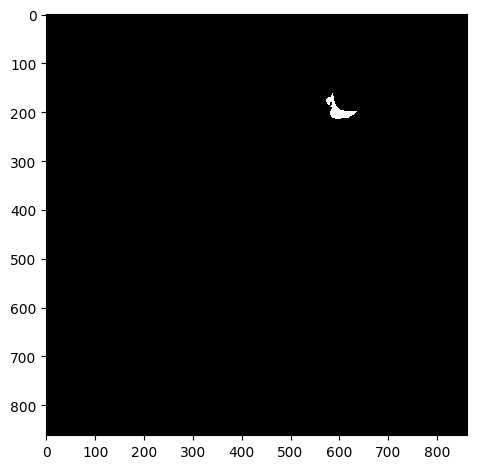

wt_PFF_no_HTRA1_Hoechst_20x_08.czi


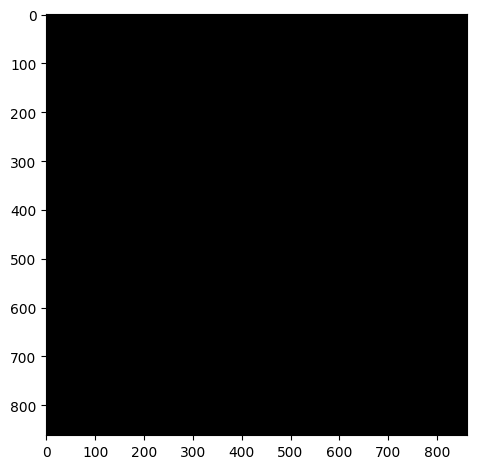

wt_PFF_no_HTRA1_Hoechst_20x_09.czi


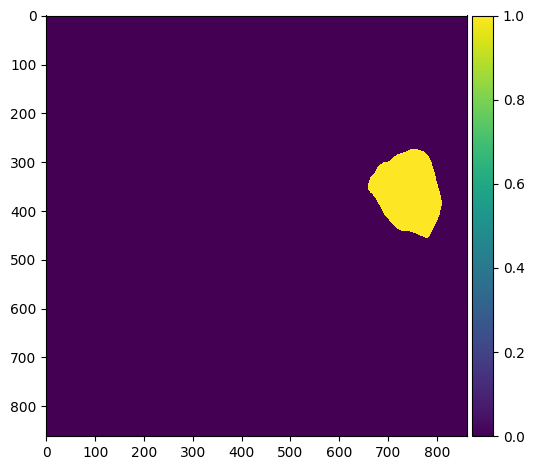

Cell:  0
Inclusion Area 1579.0
Max Inclusion Area: 1579.0
Cell Area: 18878.0
Ratio: 0.08364233499311367
Max Inclusion/Cell Area: 0.08364233499311367
Average Inclusion/Cell Area 0.08364233499311367


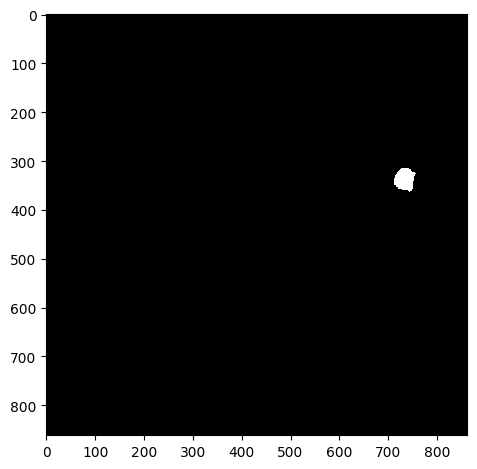

wt_PFF_no_HTRA1_Hoechst_20x_10.czi


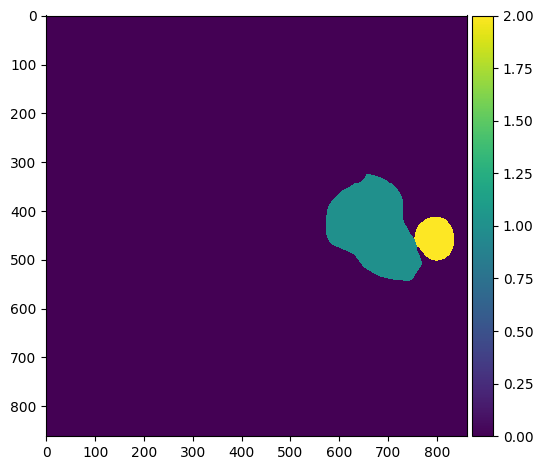

Cell:  0
Inclusion Area 560.0
Max Inclusion Area: 263.0
Cell Area: 28091.0
Ratio: 0.0199352105656616
Max Inclusion/Cell Area: 0.009362429247801786
Average Inclusion/Cell Area 0.0049838026414154


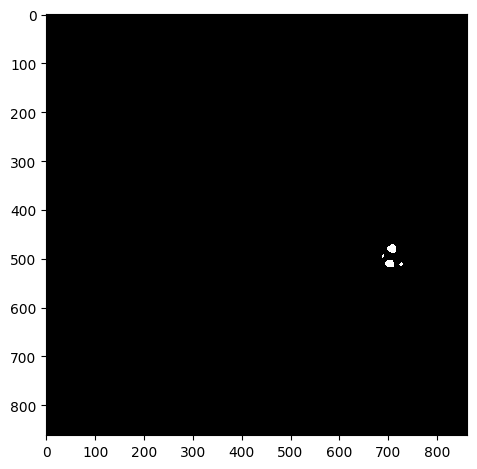

In [83]:
def main(image_folder):
    # analyze_all_images(image_folder)
    analyze_all_images_by_cell(image_folder)
    

if __name__ == "__main__":
    image_folder = '110724_PFF_HTRA1' # threshold = 0.95
    
    main(image_folder)
